# 12Week

#### 1. 집단별로 요약하기
###### 집단을 요약한 값을 구할 때는 df.groupby(), df.agg()를 사용

###### 전체 요약 통계량 구하기 df.agg()

In [88]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [3]:
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


###### df.groupby()

In [6]:
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


###### 변수를 인덱스로 바꾸지 않게 as_index = False

In [7]:
exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


###### 여러 요약 통계량 한 번에 구하기

In [10]:
exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'),
        sum_math = ('math', 'sum'),
        median_math = ('math', 'median'),
        n = ('nclass', 'count'))

,nclass,mean_math,sum_math,median_math,n
0,1,46.25,185,47.5,4
1,2,61.25,245,65.0,4
2,3,45.00,180,47.5,4
3,4,56.75,227,53.0,4
4,5,78.00,312,79.0,4


###### agg()에 자주 사용하는 요약 통계량 함수
###### mean() 평균
###### std() 표준편차
###### sum() 합계
###### median() 중앙값
###### min() 최소값
###### max() 최대값
###### count() 빈도(개수)

###### 모든 변수의 요약 통계량 한 번에 구하기 df.groupby().mean()

In [12]:
exam.groupby('nclass', as_index = False).mean()

,nclass,id,math,english,science
0,1,2.5,46.25,94.75,61.50
1,2,6.5,61.25,84.25,58.25
2,3,10.5,45.00,86.50,39.25
3,4,14.5,56.75,84.75,55.00
4,5,18.5,78.00,74.25,83.25


#### 2. 집단별로 다시 집단 나누기
###### 집단을 나눈 다음 다시 하위 집단으로 나우기

In [13]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
mpg.groupby(['manufacturer', 'drv']) \
    .agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [16]:
# audi 사의 구동 방식은 총 2가지 (4,f) n은 빈도수
mpg.query('manufacturer == "audi"') \
    .groupby(['drv']) \
    .agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


#### 3. 데이터 합치기 pd.merge(how = , on =) (가로)

In [27]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame ({'id' : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                     'finalterm' : [70, 83, 65, 95, 80]})
print(test1, test2)

   id  midterm
0   1       60
1   2       80
2   3       70
3   4       90
4   5       85    id  finalterm
0   1         70
1   2         83
2   3         65
3   4         95
4   5         80


In [30]:
total = pd.merge(test1, test2, how = 'left', on ='id')
total.head()

,id,midterm,finalterm
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


###### 다른 데이터를 활용해 변수 추가하기

In [32]:
name = pd.DataFrame({'nclass' : [1, 2, 3, 4, 5],
                    'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [34]:
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new.head()

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee


#### 4. 데이터 합치기 pd.concat()(세로)

In [37]:
groupA = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                      'test' : [60, 80, 70, 90, 85]})
groupB = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
                      'test' : [70, 83, 65, 95, 80]})
print(f'{groupA}\n{groupB}') # 출력

   id  test
0   1    60
1   2    80
2   3    70
3   4    90
4   5    85
   id  test
0   6    70
1   7    83
2   8    65
3   9    95
4  10    80


In [40]:
groupAll = pd.concat([groupA, groupB], ignore_index = True) #인덱스 새로 부여하려면 ignore_index = True, 변수명이 만약 다르다면 pd.rename()을 이용해 똑같이 맞춘 다음 합치기
groupAll

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


#### 5. 데이터 정제 | 결측치(빠진 데이터) 정제

In [44]:
# 결측치 np.nan 만들기

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                  'score' : [5, 4, 3, 4, np.nan]})
print(df)

   sex  score
0    M    5.0
1    F    4.0
2  NaN    3.0
3    M    4.0
4    F    NaN


In [45]:
# 결측치 NaN이 있는 상태로 연산하면 출력 결과도 NaN이 된다.
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

###### 결측치 확인하기 pd.isna(df)

In [47]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [48]:
print(pd.isna(df).sum()) # 결측치 빈도 확인

sex      1
score    1
dtype: int64


##### 결측치 제거하기 df.drona(subset = [''])

In [52]:
df.dropna(subset = ['score']) # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [53]:
# 추출한 에티러르 변수에 할당하고 연산하면 NaN 없이 결과가 출력 됨
dfNaNDel = df.dropna(subset = ['score'])
dfNaNDel['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

###### 여러 변수에 결측치 값 제거

In [54]:
dfNomiss = df.dropna(subset = ['score', 'sex'])
print(dfNomiss)

  sex  score
0   M    5.0
1   F    4.0
3   M    4.0


In [60]:
# 모든 결측치를 한 번에 제거하기
"""
결측치가 하나라도 있으면 모두 제거하므로 간편
하지만 분석에 필요한 행까지 손실된다는 단점
분석하는데 문제가 있는 결측치가 있는 행만 제거하는 것이 중요
"""
dfNomiss2 = df.dropna() # 아무 변수 지정 안 하면 모든 변수에서 결측치 제거
print(dfNomiss2)

  sex  score
0   M    5.0
1   F    4.0
3   M    4.0


#### 6. 결측치 대체하기

###### 평균값으로 결측치 대체하기

In [66]:
exam = pd.read_csv('exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14행의 math에 NaN 값 할당
exam.head()

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [67]:
# 우선 math의 평균 값 구하기
exam['math'].mean()

55.23529411764706

###### 평균값 55로 NaN를 대체하기 df.fillna(n)

In [68]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [70]:
exam['math'].isna().sum() # 결측치 빈도 확인

0

#### 7. 이상치 제거하기 | 존재할 수 없는 값

In [80]:
# sex 변수에 남 여 값을 1~2로, score 변수에 1~5까지의 값으로 할당
df = pd.DataFrame ({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 1, 2, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,1
2,1,2
3,3,4
4,2,2
5,1,6


###### 이상치 확인하기 value_counts().sort_index() | sort_index()를 적용하면 빈도 기준으로 내림차순이 아니라 변수의 값 순서로 정렬됨

In [83]:
df['sex'].value_counts().sort_index() # 결과 값을 보니 어라? 3이 1개가 있네?

1    3
2    2
3    1
Name: sex, dtype: int64

In [82]:
df['score'].value_counts().sort_index() # 결과 값을 보니 어라? 1~5까지의 값만 있어야 하는데 6이 있네?

1    1
2    2
4    1
5    1
6    1
Name: score, dtype: int64

###### 결측 처리하기

In [85]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,1
2,1.0,2
3,NaN,4
4,2.0,2
5,1.0,6


In [86]:
# score가 5 초과하면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,1.0
2,1.0,2.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [87]:
# sex, score 변수의 모든 이상치를 결측치로 변환하였고, 성별에 따른 score 평균을 구하기

df.dropna(subset = ['sex', 'score'])\
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,3.5
2.0,1.5


#### 8. 이상치 제거하기 | 극단적인 값

<Axes: ylabel='hwy'>

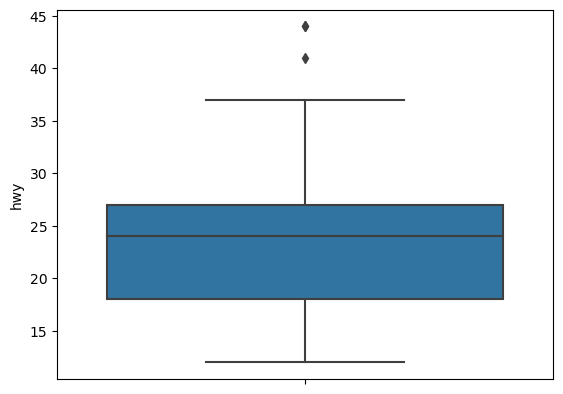

In [91]:
mpg = pd.read_csv('mpg.csv')
sb.boxplot(data = mpg, y = 'hwy')

In [100]:
# 상자 그림의 요소가 나타내는 값

boxplotValue = pd.DataFrame({'상자 그림' : ['상자 아래 세로선', '상자 밑면', '상자 내 굵은 선', '상자 윗면', '상자 위 세로선', '상자 밖 가로선', '상자 밖 점 표식'],
                            '값' : ['아랫수염', '1사분위수 Q1', '2사분위수 Q2', '3사분위수 Q3', '윗수염', '극단치 경계', '극단치'],
                            '설명' : ['하위 0~25% 내에 해당하는 값', '하위 25% 위치 값', '하위 50% 위치 값(중앙값)', '하위 75% 위치 값',
                                    '하위 75~100% 내에 해당하는 값', 'Q1, Q3 밖 1.5 IQR 내 최대값', 'Q1, Q3 밖 1.5 IQR을 벗어난 값']})
boxplotValue

,상자 그림,값,설명
0,상자 아래 세로선,아랫수염,하위 0~25% 내에 해당하는 값
1,상자 밑면,1사분위수 Q1,하위 25% 위치 값
2,상자 내 굵은 선,2사분위수 Q2,하위 50% 위치 값(중앙값)
3,상자 윗면,3사분위수 Q3,하위 75% 위치 값
4,상자 위 세로선,윗수염,하위 75~100% 내에 해당하는 값
5,상자 밖 가로선,극단치 경계,"Q1, Q3 밖 1.5 IQR 내 최대값"
6,상자 밖 점 표식,극단치,"Q1, Q3 밖 1.5 IQR을 벗어난 값"


#### 9. 극단치 기준값 구하기

###### 1사분위수, 3사분위수 구하기 df.quantile()

In [106]:
pct25 = mpg['hwy'].quantile(.25) # 하위 25%
pct25

18.0

In [105]:
pct75 = mpg['hwy'].quantile(.75) # 하위 75%
pct75

27.0

###### IQR 구하기 | IQR = 1사분위수와 3사분위수 거리 

In [107]:
iqr = pct75 - pct25
iqr

9.0

###### 하한(1사분위수보다 'IQR의 1.5배' 만큼 더 작은 값), 상한 구하기(3사분위수보다 'IQR의 1.5배'만큼 더 큰 값)

In [109]:
pct25 - 1.5 * iqr # 하한
pct75 + 1.5 * iqr # 상한
print(pct25, pct75)

18.0 27.0


###### 극단치 결측 처리하기

In [111]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                     np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

###### 결측치 제거하고 분석하기 hwy 결측치 제거 후 drv별 분리하고 hwy 평균 구하기

In [113]:
mpg.dropna(subset = ['hwy']) \
          .groupby('drv') \
          .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
